<a href="https://colab.research.google.com/github/shub-codes/CIFAR-10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization # Corrected Conv2D typo
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

cifar10 is not in format of dataframe. it is by default in train and test split format. it is split into 50000 training and 10000 testing images

In [26]:
(X_train,y_train), (X_test,y_test)=cifar10.load_data()


In [27]:
X_train, X_valid, y_train, y_valid=train_test_split(X_train,y_train,train_size=0.8,random_state=42)
print('Train Images Shape:      ', X_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nValidation Images Shape: ', X_valid.shape)
print('Validation Labels Shape: ', y_valid.shape)

print('\nTest Images Shape:       ', X_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (40000, 32, 32, 3)
Train Labels Shape:       (40000, 1)

Validation Images Shape:  (10000, 32, 32, 3)
Validation Labels Shape:  (10000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


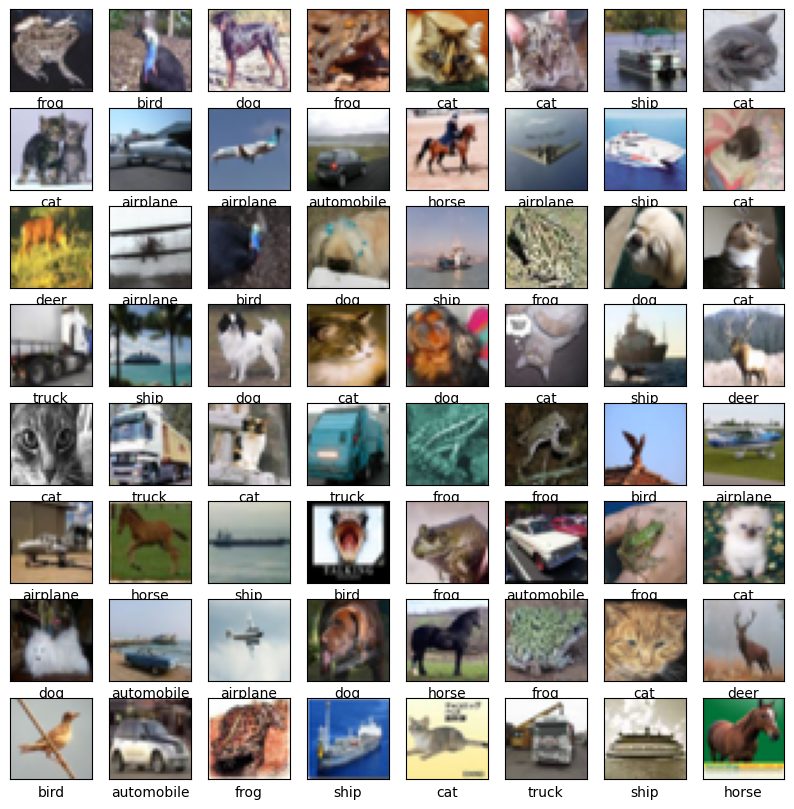

In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

DATA PREPROCESSING

convert pixel to float 32 format

In [30]:
X_train=X_train.astype('float32')
X_valid=X_valid.astype('float32')
X_test=X_test.astype('float32')


standardize the training dataset




In [31]:
mean=np.mean(X_train)
std=np.std(X_train)
X_train=(X_train-mean)/std
X_valid=(X_valid-mean)/std
X_test=(X_test-mean)/std

One hot encoding of label dataset

In [ ]:
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)

Data augmentation to expand the dataset size by creating modified version of existing datasets

In [32]:
data_augmentor=ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.25,
    brightness_range=[0.8,1.2],
    shear_range=20,
    channel_shift_range=0.2
)

CNN MODEL ARCHITECTURE

In [ ]:
from keras.layers import Input
model=Sequential()
weight_decay=1e-4
# Add Input layer
model.add(Input(shape=X_train.shape[1:]))
# first convo2d layer
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
# batch normalization layer
model.add(BatchNormalization())
# second convo2d layer
model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
# max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer
model.add(Dropout(0.2))
# third and fourth convo2d layer with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# droput layer
model.add(Dropout(0.3))
# 5th and 6th convo2d layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# droput layer
model.add(Dropout(0.4))
# 7th and 8th convo2d layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
# droput layer
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

Training the CNN model

In [15]:
batch_size=64
epochs=20
optimizer=Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
early_stopping=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1)
model.fit(data_augmentor.flow(X_train,y_train,batch_size=batch_size),epochs=epochs,validation_data=(X_valid,y_valid),callbacks=[reduce_lr,early_stopping],verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 - 596s - 954ms/step - accuracy: 0.4969 - loss: 1.6012 - val_accuracy: 0.5206 - val_loss: 1.5619 - learning_rate: 1.0000e-03
Epoch 2/20
625/625 - 555s - 889ms/step - accuracy: 0.5050 - loss: 1.5862 - val_accuracy: 0.5147 - val_loss: 1.5569 - learning_rate: 1.0000e-03
Epoch 3/20
625/625 - 554s - 887ms/step - accuracy: 0.5163 - loss: 1.5565 - val_accuracy: 0.5389 - val_loss: 1.4926 - learning_rate: 1.0000e-03
Epoch 4/20
625/625 - 559s - 894ms/step - accuracy: 0.5289 - loss: 1.5334 - val_accuracy: 0.5174 - val_loss: 1.5920 - learning_rate: 1.0000e-03
Epoch 5/20
625/625 - 555s - 887ms/step - accuracy: 0.5344 - loss: 1.5214 - val_accuracy: 0.5660 - val_loss: 1.4349 - learning_rate: 1.0000e-03
Epoch 6/20
625/625 - 555s - 889ms/step - accuracy: 0.5423 - loss: 1.5013 - val_accuracy: 0.5659 - val_loss: 1.4356 - learning_rate: 1.0000e-03
Epoch 7/20
625/625 - 540s - 864ms/step - accuracy: 0.5484 - loss: 1.4910 - val_accuracy: 0.5658 - val_loss: 1.4856 - learning_rate: 1.0000e-03

In [16]:
# Save the model
model.save('cifar10_cnn_model.h5')
print("Model saved successfully!")

Model saved successfully!


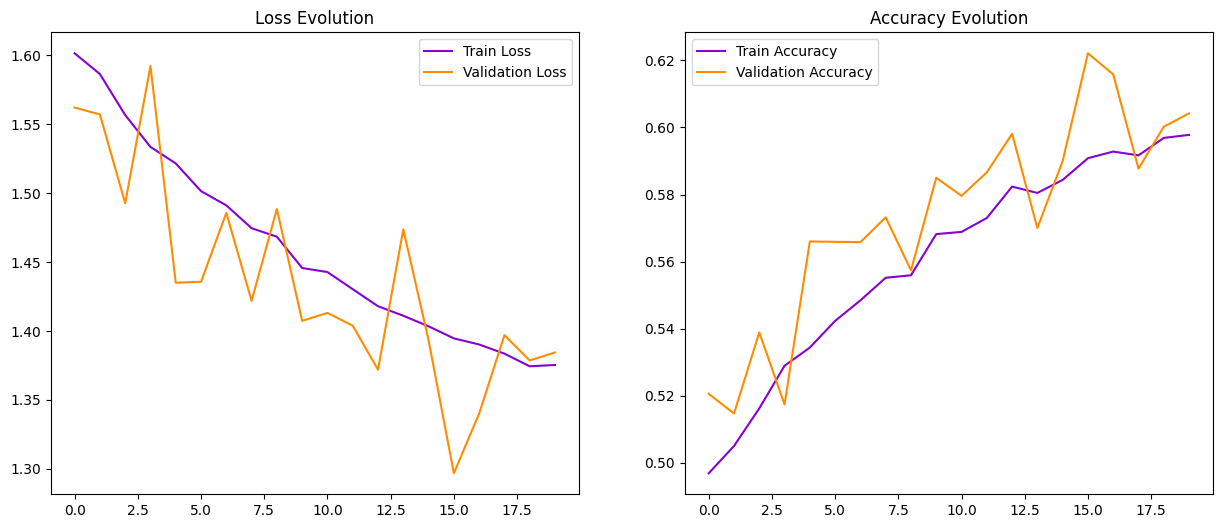

In [33]:
plt.figure(figsize=(15,6))

# Plotting the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()


In [35]:
# One-hot encode y_test
y_test_encoded = to_categorical(y_test)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.6174 - loss: 1.3071

Test Accuracy: 0.6184999942779541
Test Loss:     1.3070529699325562


In [36]:
image_path = "/content/pexels-pixabay-46148.jpg" # Replace with the actual path to your local image file

# Load the image from the local file path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("Image loaded and converted to RGB successfully!")

Image loaded and converted to RGB successfully!


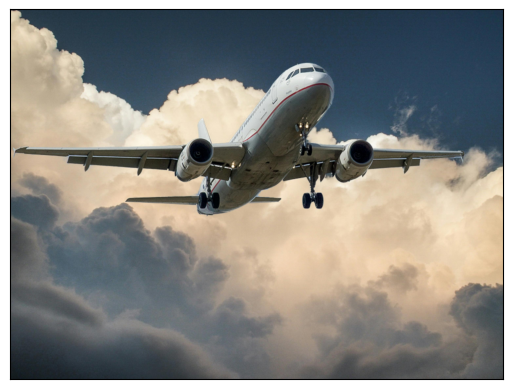

In [37]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [38]:
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
prediction = model.predict(image)
predicted_class = prediction.argmax()

print('Predicted class: ', class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class:  airplane


As the model was saved, we can start training it again at the point it left off. it will help us train the model in increments

In [ ]:
# Load the saved model
loaded_model = load_model('cifar10_cnn_model.h5')

# Compile the loaded model (important to do after loading)
# You can use the same optimizer and loss function as before
loaded_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the loaded model
# You can train for additional epochs
epochs_to_train_further = 20 # Define how many more epochs you want to train
history_continued = loaded_model.fit(
    data_augmentor.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs_to_train_further,
    validation_data=(X_valid, y_valid),
    callbacks=[reduce_lr, early_stopping], # You can reuse or define new callbacks
    verbose=2
)